In [1]:
from pytube import YouTube
from pytube import Channel
from pytube import extract
import pandas as pd
from collections import defaultdict
import os

In [2]:
import logging

logging.basicConfig(level=logging.INFO, filename='video_metadata.log', 
                    format='%(asctime)s : %(levelname)s : %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S')

In [3]:
file_test = 'video_urls_FULL.csv'
df = pd.read_csv(file_test)
df = df.sample(n= 1000, random_state=495).drop(columns='Unnamed: 0')

In [ ]:
#df = df[255:265].reset_index(drop= True)

In [ ]:
df.shape

In [4]:
def itags(youtube_video, url, file):

    try: 
        itag_lst = youtube_video.streams.filter(only_video=True).asc() # get the highest resolution possible

        if len(itag_lst) >= 2:
            bests = [int(itag_lst[i].itag) for i in range(0,2)]
        elif len(itag_lst) == 1:
            bests = [int(itag_lst.itag), None]
        else:
            logging.info(f'The lenght of itag_list is zero for video {url}')
            bests = [None]*2
            file.write(f'Url with no itags: {url} \n')
    except:
        logging.info(f'Itags not retrieved. Video: {url}')
        file.write(f'Itags not retrieved. Video: {url} \n')
        bests = bests = [None]*2
        

    return bests

In [5]:
def video_metadata_v2(df):
    keys = ['channel', 'url', 'id', 'title', 'author', 'description', 'keywords', 'length_in_secs', 
            'nbr_views', 'age_resticted', 'publication_date', 'rating','best_itag','sec_itag']

    metadata = defaultdict(list)
    #destino = '../Data_collection/data/'
    catched_url = open('catched_urls.txt', 'w')

    for idx in range(0,df.shape[0]):

        # Access the video url from data frame
        video_url = df['url'].iloc[idx]
        channel_name = df['channel'].iloc[idx]

        # Create a youtube object to use the API
        yt = YouTube(video_url)

        # Get itags
        itag_lst = itags(yt,video_url,catched_url)
        
        # Extract metadata
        info = [channel_name, video_url, extract.video_id(video_url), yt.title, yt.author, yt.description,
        yt.keywords, yt.length, yt.views, yt.age_restricted, yt.publish_date, yt.rating, itag_lst[0],itag_lst[1]]

        # Store in dictionary 
        for k, v in zip(keys,info):
            metadata[k].append(v)
                    
        # Track 
        if idx % 100 == 0:
            print(f'We are in video {idx} in channel {yt.author}')

    return metadata


In [6]:
# Getting all the metadata 
info = video_metadata_v2(df)

We are in video 0 in channel UGT FICA
We are in video 100 in channel Lärarförbundet
We are in video 200 in channel CISL - Confederazione Italiana Sindacati Lavoratori
We are in video 300 in channel FNP CISL Nazionale
We are in video 400 in channel Sindacato CISL Veneto
We are in video 500 in channel Uilca Nazionale
We are in video 600 in channel Fim Cisl Stampa
We are in video 700 in channel Norsk Sykepleierforbund
We are in video 800 in channel Landsorganisasjonen i Norge
We are in video 900 in channel LAB Sindikatua


In [7]:
df_meta = pd.DataFrame.from_dict(info)
df_meta

,channel,url,id,title,author,description,keywords,length_in_secs,nbr_views,age_resticted,publication_date,rating,best_itag,sec_itag
0,FITAGVIDEOS,youtube.com/watch?v=0_Ac64tilJ0,0_Ac64tilJ0,UGT FICA participa en el Foro debate Empresari...,UGT FICA,Pedro Hojas invita a la Mesa Negociadora del X...,"[ugt, fica ugt]",185,142,False,2017-12-14,None,137.0,136.0
1,Industrifacketmetall,youtube.com/watch?v=50mIptKUbOU,50mIptKUbOU,"Anders Ferbe, IF Metalls förbundsordförande",IF Metall,,"[Kongress, 2014, IF Metall, kongress14, Facket]",233,97,False,2014-05-17,None,137.0,136.0
2,fagforbundet3762,youtube.com/watch?v=s-odsdJKCpA,s-odsdJKCpA,FF1715 1900,Fagforbundet,Mandag 1700 1900,[],6481,134,False,2013-11-11,None,137.0,136.0
3,fspugt,youtube.com/watch?v=by34p_4oTI8,by34p_4oTI8,Empleadas y Empleados Públicos Esenciales: Mas...,Servicios Públicos UGT,"Homenaje, desde La Conferencia de La Mujer de ...",[],477,1133,False,2022-03-17,None,136.0,247.0
4,uniopagesoscatalunya,youtube.com/watch?v=QfqfoKfEYyk,QfqfoKfEYyk,Joves d'Unió de Pagesos - un futur amb pagesia...,Unió de Pagesos de Catalunya,Diferents membres de Joves d'Unió de Pagesos e...,[],174,373,False,2021-03-08,None,137.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Skolvarlden,youtube.com/watch?v=gkd8B2ykZ_k,gkd8B2ykZ_k,Flydde kriget - med grammatikboken,Skolvarlden,Läraren Indira Stefanovic berättar sin histori...,[youtube],254,520,False,2013-03-19,None,136.0,135.0
996,Lararforbundet,youtube.com/watch?v=e6JyeYU8-dA,e6JyeYU8-dA,Min trygghet,Lärarförbundet,,[],127,239,False,2020-02-05,None,137.0,248.0
997,ccoocyl,youtube.com/watch?v=ZEhk2qF1sXU,ZEhk2qF1sXU,Jornada - Presente y futuro del procedimiento ...,ccoocyl,2ª Parte. Análisis sindical,[],4130,31,False,2021-11-03,None,137.0,136.0
998,Industrifacketmetall,youtube.com/watch?v=i54ysWc4SoM,i54ysWc4SoM,IF Metalls kongress 2014 - Vår arbetsplats,IF Metall,IF Metalls kongressen behandlar under lördagen...,"[IF Metall, Kongress, ifmetall14, Facket, Arbe...",349,293,False,2014-05-17,None,136.0,135.0


In [8]:
itags = df_meta[['best_itag', 'sec_itag']]
itags['best_itag'] = itags['best_itag'].fillna(400).astype(int)
itags['sec_itag']=itags['sec_itag'].fillna(400).astype(int)

/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_1906/2451658842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itags['best_itag'] = itags['best_itag'].fillna(400).astype(int)
/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_1906/2451658842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itags['sec_itag']=itags['sec_itag'].fillna(400).astype(int)


In [9]:
list(set(itags['best_itag'].to_list()))

[133, 134, 135, 136, 137, 298, 299, 271, 400, 248, 313]

<AxesSubplot:>

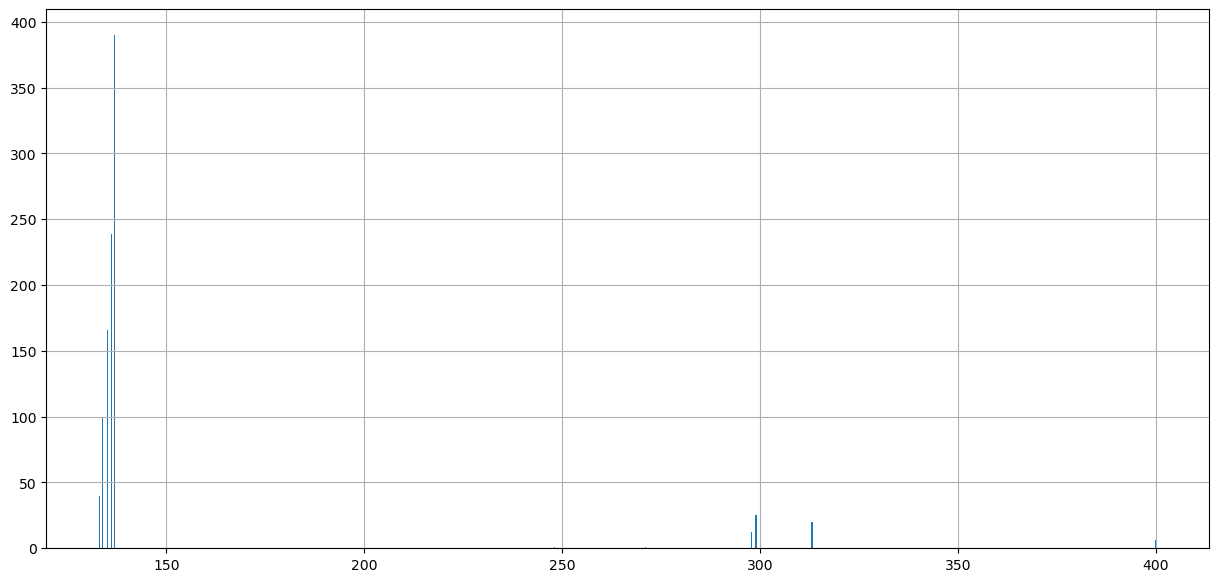

In [10]:
itags['best_itag'].hist(bins=1000,figsize=(15,7))

<AxesSubplot:>

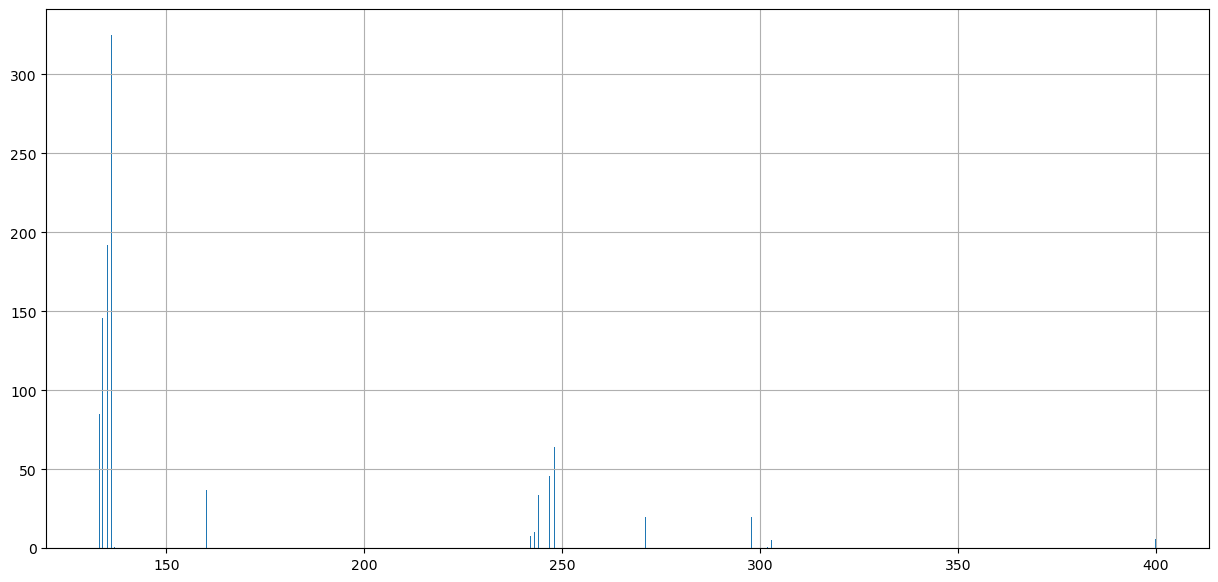

In [11]:
itags['sec_itag'].hist(bins=1000,figsize=(15,7))